In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [117]:
abs_db = pd.read_csv('../data/absorption_data.csv', delimiter="\t")
print(abs_db.head())

      c [mol/l]  av. [au]  std [au]
0  1.527778e-07  0.022679  0.000613
1  1.358025e-07  0.017082  0.001499
2  1.188272e-07  0.019845  0.001585
3  1.018519e-07  0.012935  0.002459
4  8.487654e-08  0.010958  0.000337


In [118]:
l_per_drop = 0.025 / 1000
mole_per_liter = 5.5*10**(-6)
cuvette_length = 1.0  # cm
cuvette_volume = 0.0027  # l
mole_per_drop = 5.321 * 10**(-6)  # mol/liter

In [119]:
def fit_func(x, a, b):
    return a * x + b

In [120]:
popt, pcov = curve_fit(fit_func, abs_db["c [mol/l]"], abs_db["av. [au]"], sigma=abs_db["std [au]"])

a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))

print(a, b)
print(a_err, b_err)

141743.7437658154 -0.00017076647323617045
11292.048730556007 0.0009957429733414062


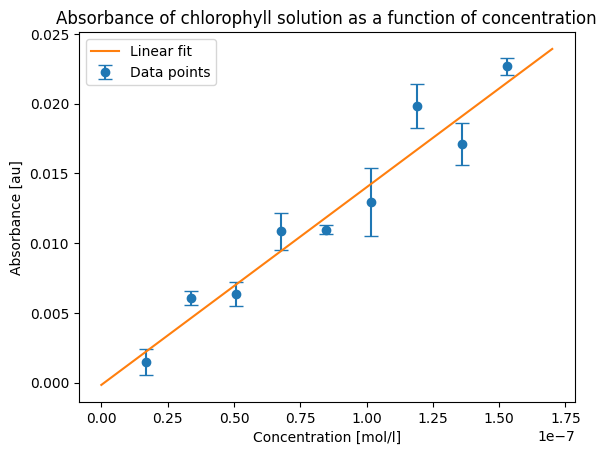

In [121]:
plt.errorbar(abs_db["c [mol/l]"], abs_db["av. [au]"], yerr=abs_db["std [au]"], fmt='o', capsize=5, label="Data points")

xs = np.linspace(0, 1.7*10**(-7), 1000)
plt.plot(xs, fit_func(xs, a, b), label="Linear fit")

plt.title("Absorbance of chlorophyll solution as a function of concentration")
plt.xlabel("Concentration [mol/l]")
plt.ylabel("Absorbance [au]")

plt.legend()
plt.show()

In [122]:
print(f"a = {round(a)} +/- {round(a_err)}")  # choosing greater peak at the (theoretical) value of 427.8nm

a = 141744 +/- 11292


In [123]:
spect_data = pd.read_csv('../data/spectrum_data.csv', delimiter="\t")
print(spect_data.head())

   lambda (nm)  A (1 drop)  A (4 drops)  A (6 drops)
0      365.036         0.0          0.0          0.0
1      365.207         0.0          0.0          0.0
2      365.378         0.0          0.0          0.0
3      365.549         0.0          0.0          0.0
4      365.721         0.0          0.0          0.0


In [124]:
# Find peaks in abosorption spectrum
vial_peak_cutoff_index = 150

peaks_indices1, peak1_properties = find_peaks(spect_data["A (1 drop)"][vial_peak_cutoff_index:], width=10, height=0.1, distance=100)
peaks_indices4, peak2_properties = find_peaks(spect_data["A (4 drops)"][vial_peak_cutoff_index:], width=10, height=0.2, distance=100)
peaks_indices6, peak3_properties = find_peaks(spect_data["A (6 drops)"][vial_peak_cutoff_index:], width=10, height=0.2, distance=100)

print(peaks_indices1, peak1_properties)
print(peaks_indices4, peak2_properties)
print(peaks_indices6, peak3_properties)

peak1_index = np.mean([peaks_indices1[0], peaks_indices4[0], peaks_indices6[0]]) + vial_peak_cutoff_index
peak2_index = np.mean([peaks_indices1[1], peaks_indices4[1], peaks_indices6[1]]) + vial_peak_cutoff_index

peak1_wavelength = spect_data["lambda (nm)"][int(peak1_index)]
peak2_wavelength = spect_data["lambda (nm)"][int(peak2_index)]


[ 239 1582] {'peak_heights': array([0.183, 0.111]), 'prominences': array([0.052, 0.048]), 'left_bases': array([  0, 970]), 'right_bases': array([1966, 1966]), 'widths': array([103., 117.]), 'width_heights': array([0.157, 0.087]), 'left_ips': array([ 183., 1516.]), 'right_ips': array([ 286., 1633.])}
[ 245 1582] {'peak_heights': array([0.615, 0.313]), 'prominences': array([0.251, 0.224]), 'left_bases': array([  8, 930]), 'right_bases': array([1979, 1979]), 'widths': array([115.26666667, 118.66666667]), 'width_heights': array([0.4895, 0.201 ]), 'left_ips': array([ 169.83333333, 1516.        ]), 'right_ips': array([ 285.1       , 1634.66666667])}
[ 236 1582] {'peak_heights': array([1.321, 0.471]), 'prominences': array([0.689, 0.364]), 'left_bases': array([  7, 946]), 'right_bases': array([1968, 1968]), 'widths': array([ 82.58333333, 115.33333333]), 'width_heights': array([0.9765, 0.289 ]), 'left_ips': array([ 193.16666667, 1518.66666667]), 'right_ips': array([ 275.75, 1634.  ])}


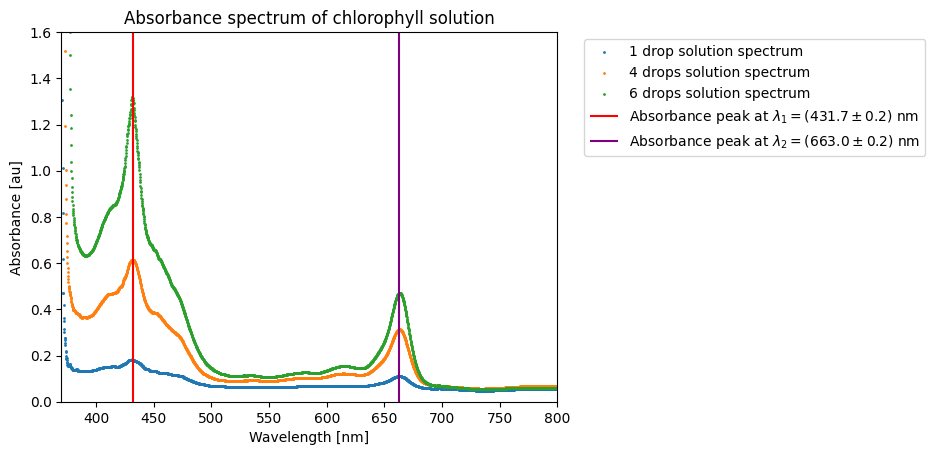

In [125]:
plt.scatter(spect_data["lambda (nm)"], spect_data["A (1 drop)"], label="1 drop solution spectrum", s=1)
plt.scatter(spect_data["lambda (nm)"], spect_data["A (4 drops)"], label="4 drops solution spectrum", s=1)
plt.scatter(spect_data["lambda (nm)"], spect_data["A (6 drops)"], label="6 drops solution spectrum", s=1)

plt.vlines(peak1_wavelength, 0, 1.6, label=f"Absorbance peak at $\lambda_1 = \left({peak1_wavelength:.1f} \pm 0.2\\right)$ nm", colors="r")
plt.vlines(peak2_wavelength, 0, 1.6, label=f"Absorbance peak at $\lambda_2 = \left({peak2_wavelength:.1f} \pm 0.2\\right)$ nm", colors='purple')

plt.xlim(370, 800)
plt.ylim(0, 1.6)

plt.title("Absorbance spectrum of chlorophyll solution")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Absorbance [au]")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()